In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegressionCV

In [98]:
load_path = 'D:\EECE499\Features\\'
#load_path = '..\..\..\..\\'

In [99]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [100]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

In [101]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [103]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [104]:
classifier = LogisticRegression(random_state = 42, solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
y_pred = classifier.predict(X_test)

In [106]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [107]:
confusion_mtrx

array([[ 0,  2,  0,  1,  1,  0],
       [ 1,  2,  0,  7,  3,  0],
       [ 1,  2,  3, 14,  8,  3],
       [ 1,  6,  7, 20,  6,  1],
       [ 0,  3,  4, 11,  2,  1],
       [ 0,  0,  0,  6,  3,  2]], dtype=int64)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [109]:
print(accuracy, mae, rmse)

0.2396694214876033 1.2396694214876034 2.4297520661157024


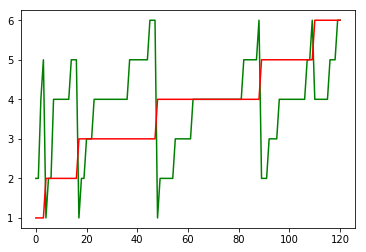

In [110]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

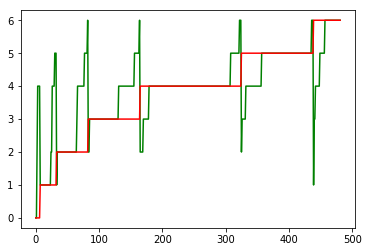

In [111]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [112]:
classifier = LogisticRegressionCV(Cs=1, random_state = 42, solver='lbfgs', max_iter=1000, cv=10)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LogisticRegressionCV(Cs=1, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [113]:
y_pred = classifier.predict(X_test)

In [114]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [115]:
confusion_mtrx

array([[ 0,  0,  0,  4,  0,  0],
       [ 0,  0,  0, 13,  0,  0],
       [ 0,  0,  0, 30,  1,  0],
       [ 0,  0,  0, 41,  0,  0],
       [ 0,  0,  0, 21,  0,  0],
       [ 0,  0,  1, 10,  0,  0]], dtype=int64)

In [116]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [117]:
print(accuracy, mae, rmse)

0.33884297520661155 0.9421487603305785 1.5867768595041323


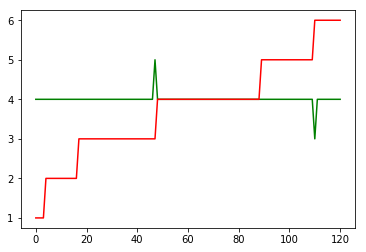

In [118]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

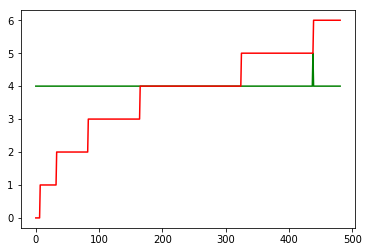

In [119]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

classifier = m.LogisticIT()

rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error', verbose=1)
X_new = rfecv.fit_transform(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()